## Exploratory Data Analisys
Derecha Diario

### Load tokens
"derecha diario" tokens

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
tokens = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

### Tf IDf Scores

#### TfIDf Transformation

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
tfidf_inf = TfidfTransformer().fit_transform(tokens[tokens.topics == 'inflation'].drop('topics', axis=1))

In [5]:
tfidf_inf_df = pd.DataFrame(tfidf_inf.todense(), columns = tokens[tokens.topics == 'inflation'].drop('topics', axis=1).columns)
tfidf_inf_df.shape

(33, 4690)

In [6]:
tfidf_ex = TfidfTransformer().fit_transform(tokens[tokens.topics == 'exchange'].drop('topics', axis=1))

In [7]:
tfidf_ex_df = pd.DataFrame(tfidf_ex.todense(), columns = tokens[tokens.topics == 'exchange'].drop('topics', axis=1).columns)
tfidf_ex_df.shape

(28, 4690)

### Visual Representation
#### Tf IDf per document
See top rated terms per document and their scores

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['figure.figsize'] = [18 , 30]

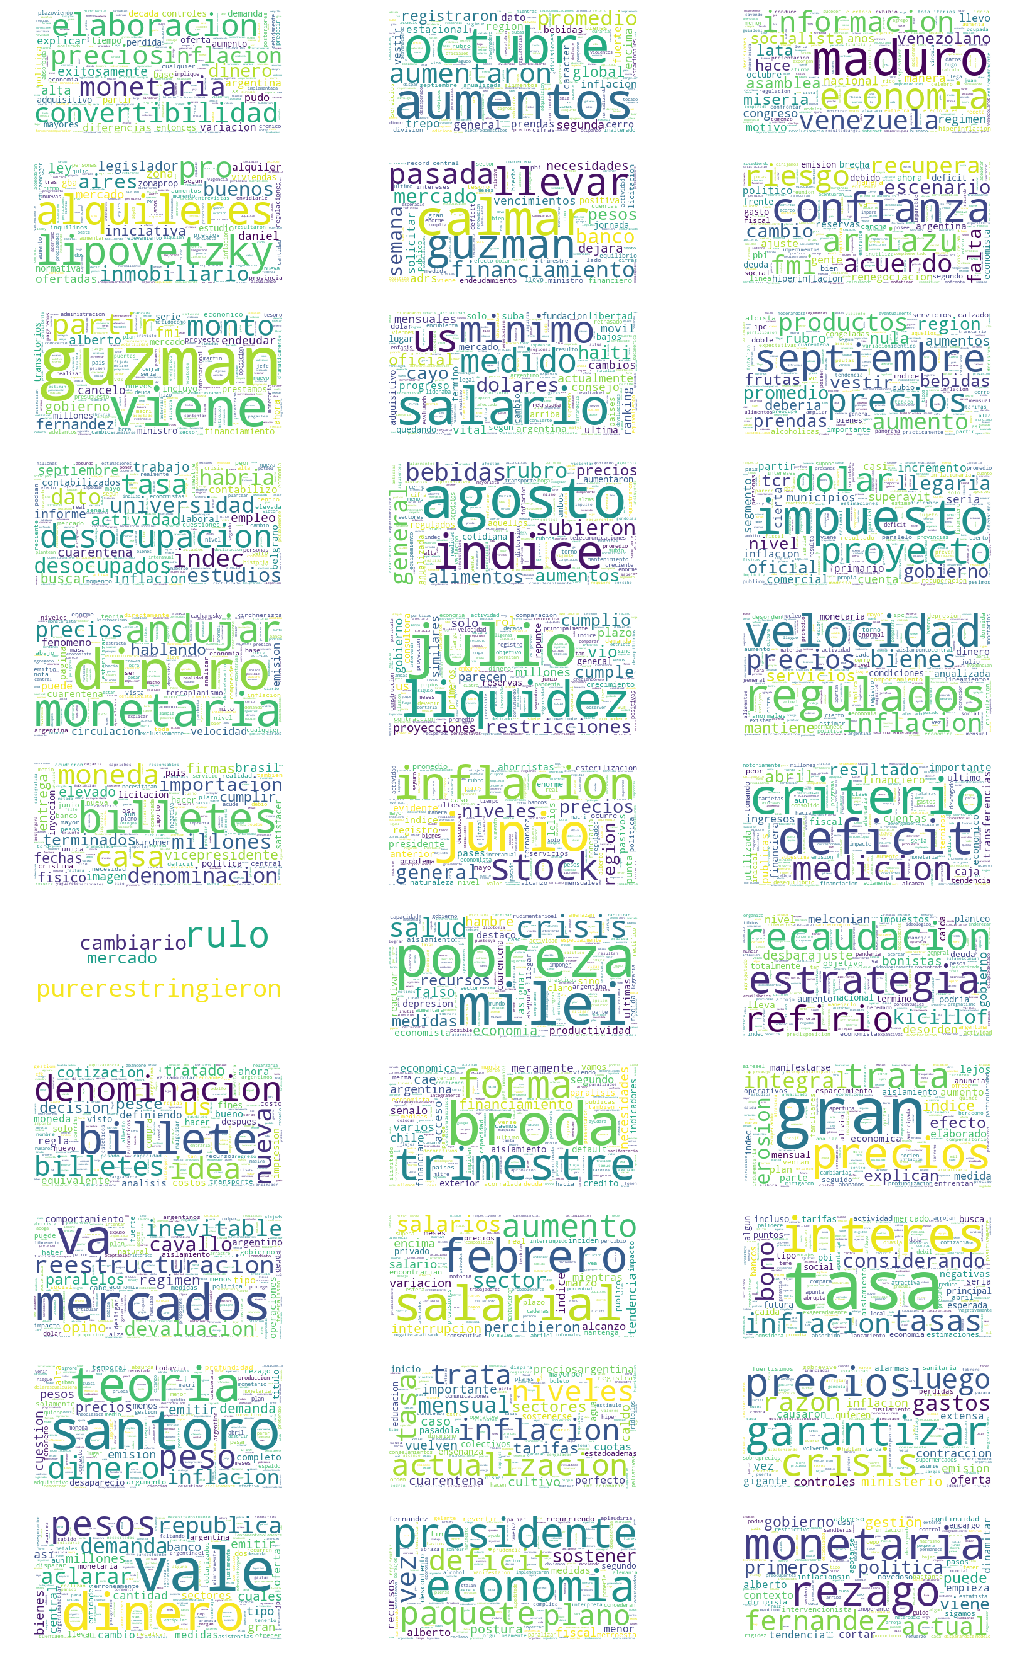

In [10]:
for row in range(tfidf_inf_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_inf_df.iloc[row].sort_values())
    plt.subplot(11, 3, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

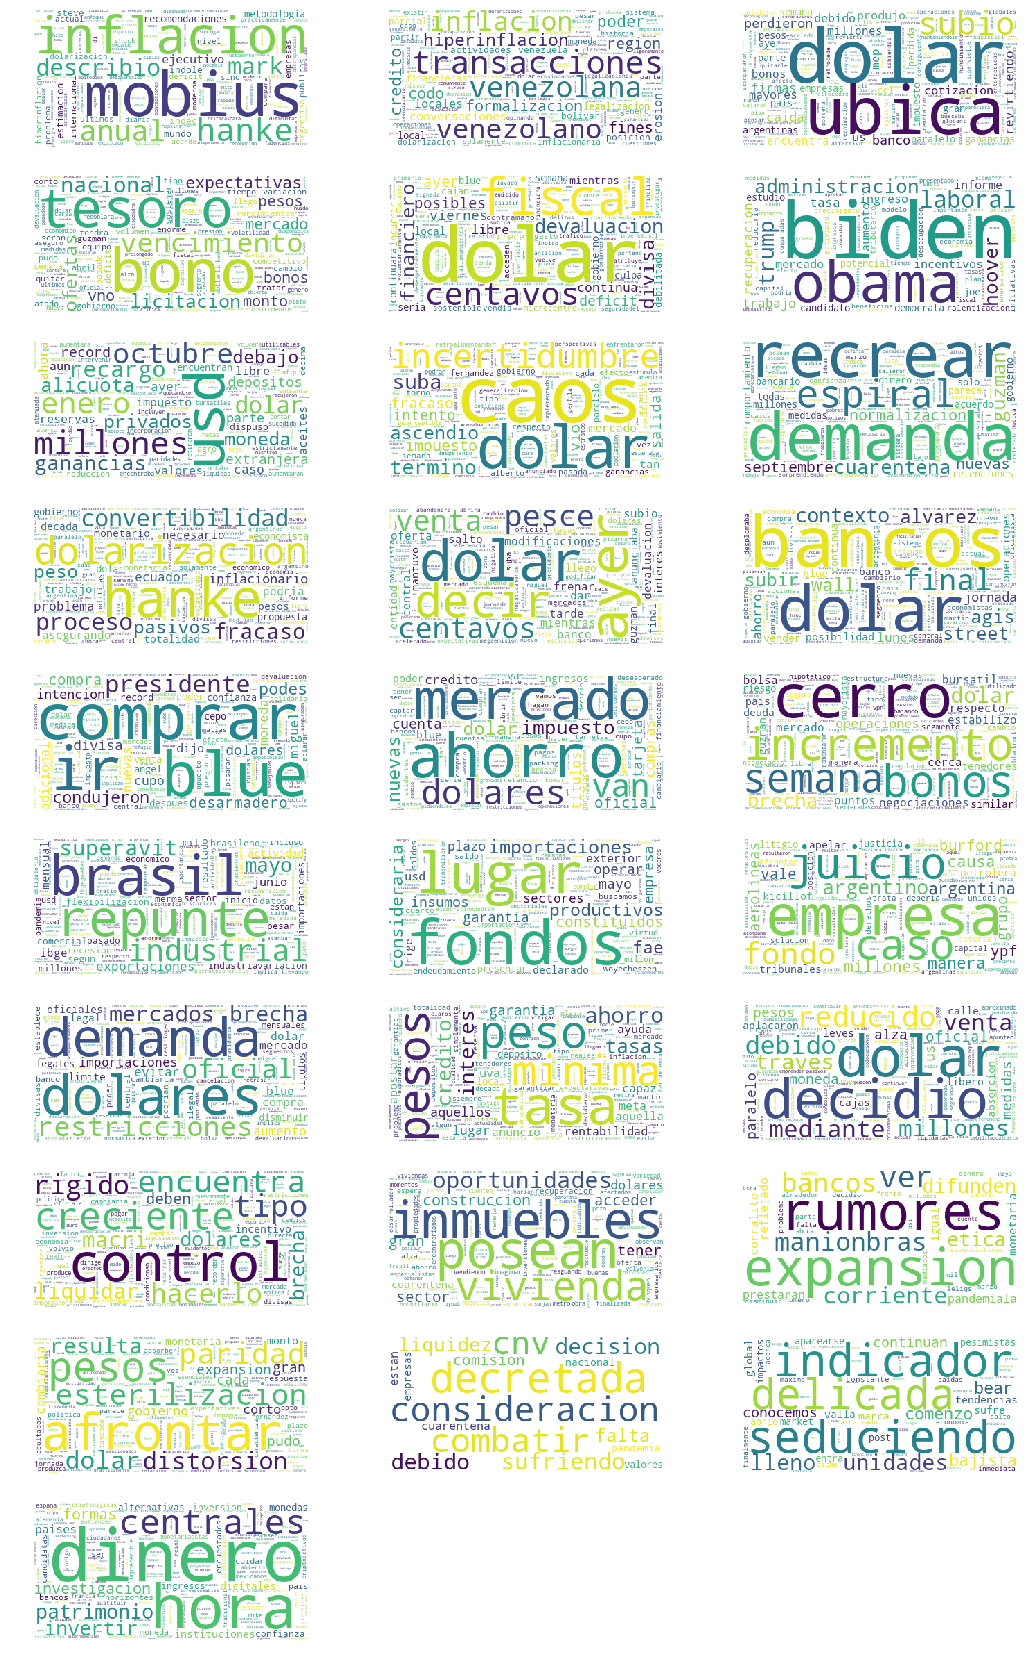

In [11]:
for row in range(tfidf_ex_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_ex_df.iloc[row].sort_values())
    plt.subplot(10, 3, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

#### Tf IDf per topic
See top rated terms amid documents of the same topic

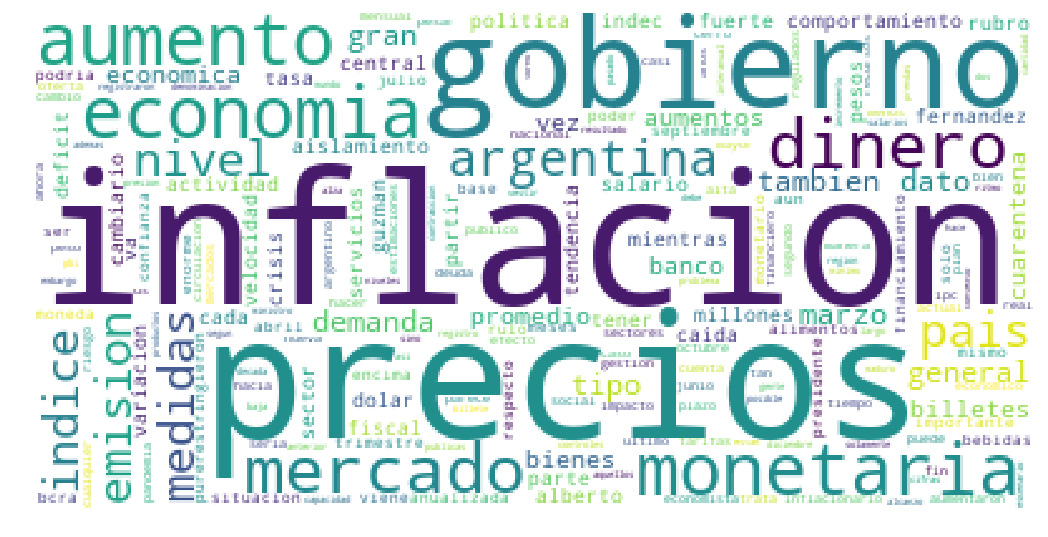

In [12]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_inf_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.show()

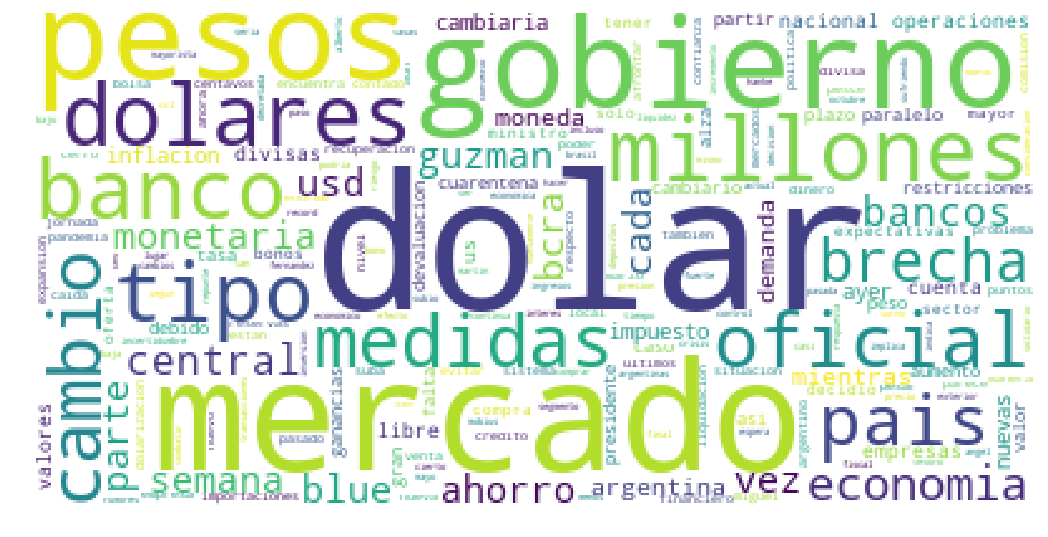

In [13]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_ex_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Combinations

In [14]:
tfidf = TfidfTransformer().fit_transform(tokens.drop('topics', axis=1))
tfidf_df = pd.DataFrame(tfidf.todense(), columns = tokens.drop('topics', axis=1).columns)

In [15]:
tfidf_df.index = ['inf'+ str(i) for i in range(len(tokens[tokens.topics == 'inflation']))] + ['ex'+ str(i) for i in range(len(tokens[tokens.topics == 'exchange']))]

In [16]:
n_inf_news = len(tokens[tokens.topics == 'inflation'])

### SVD

In [17]:
from sklearn.decomposition import TruncatedSVD

In [18]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(tfidf_df)
P = np.around(p,3)

#### Plot

In [19]:
import plotly.graph_objects as go

In [20]:
labels = tfidf_df.index.tolist()

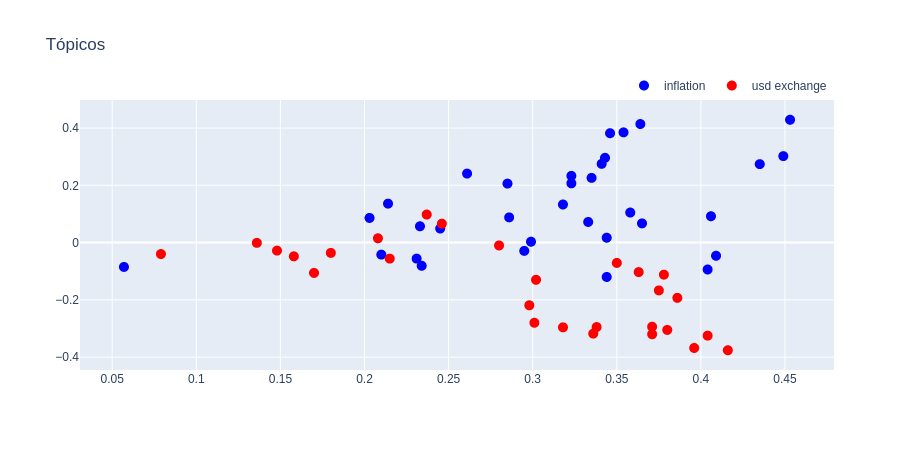

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = P[:n_inf_news,0], y = P[:n_inf_news,1],
    mode ='markers',
    text = labels[:n_inf_news],
    marker = dict(
        size = 10,
        color = 'blue',
    ),
    name='inflation',
    )
)

fig.add_trace(go.Scatter(
    x = P[n_inf_news:,0], y = P[n_inf_news:,1],
    mode ='markers',
    text = labels[n_inf_news:],
    marker = dict(
        size = 10,
        color = 'red',
    ),
    name='usd exchange',
    )
)

fig.update_layout(title='Tópicos', 
                  xaxis_zeroline=True,
                  legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=1,
                        xanchor="right",
                        x=1
                  )
)

fig.update_layout(title='Tópicos', xaxis_zeroline=True)

fig.show()

In [22]:
comp1, comp2 = svd.components_

In [23]:
indices1 = np.argsort(comp1)

In [24]:
indices1 = indices1[::-1]
indices1[:20]

array([2426, 1534, 3469, 2155, 2867, 2944,  478, 3363, 1567, 4394, 2835,
        515, 2902, 1471, 1535, 3187,  387, 2187,  652,  731])

In [25]:
indices2 = np.argsort(comp2)
indices2 = indices2[::-1]

In [26]:
indices2[:20]

array([3469, 2426, 2404,  478, 3595,  479, 1471, 1198, 3864, 4029,  233,
       2127,  544,  537,  321, 2392, 4574, 2548, 2860, 4559])

In [27]:
dim1 = np.array(tfidf_df.columns)[indices1]
print(f'Dimensión 1:\n{dim1[:50]}')

Dimensión 1:
['inflacion' 'dolar' 'precios' 'gobierno' 'mercado' 'monetaria' 'aumento'
 'pesos' 'economia' 'tipo' 'medidas' 'banco' 'millones' 'dinero' 'dolares'
 'pais' 'argentina' 'guzman' 'cambio' 'central' 'demanda' 'oficial' 'gran'
 'nivel' 'emision' 'brecha' 'vez' 'cada' 'parte' 'mientras' 'bcra'
 'general' 'tasa' 'politica' 'indice' 'tambien' 'cuarentena' 'caida'
 'semana' 'marzo' 'partir' 'economica' 'dato' 'comportamiento' 'fernandez'
 'blue' 'presidente' 'impuesto' 'ahorro' 'bancos']


In [28]:
dim2 = np.array(tfidf_df.columns)[indices2]
print(f'Dimensión 2:\n{dim2[:50]}')

Dimensión 2:
['precios' 'inflacion' 'indice' 'aumento' 'promedio' 'aumentos' 'dinero'
 'dato' 'regulados' 'rubro' 'alimentos' 'general' 'bienes' 'bebidas'
 'anualizada' 'indec' 'velocidad' 'ipc' 'mensual' 'variacion' 'servicios'
 'aumentaron' 'septiembre' 'region' 'vestir' 'prendas' 'nivel' 'monetaria'
 'tarifas' 'actividad' 'comportamiento' 'registraron' 'emision' 'encima'
 'tendencia' 'alta' 'circulacion' 'marzo' 'gran' 'aislamiento'
 'cuarentena' 'calzado' 'productos' 'niveles' 'estacional' 'junio' 'abril'
 'rubros' 'economia' 'interanual']


#### Outliers

In [29]:
tokens_inf = tokens[tokens.topics == 'inflation'].drop('topics', axis=1)

In [30]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))
data_inf = data[:n_inf_news]

In [31]:
tfidf_inf = tfidf_df[:n_inf_news]

In [32]:
outlier_mask = P[:n_inf_news, 1] < 0
outlier_mask.sum()

8

In [34]:
for i in range(outlier_mask.sum()):
    print(f'HEADLINE:\n{data_inf[outlier_mask].iloc[i].title}')
    print(f'LEAD:\n{data_inf[outlier_mask].iloc[i].lead}')
    print(f'COUNT:\n{tokens_inf[outlier_mask].iloc[i].sort_values(ascending=False)[:10].to_dict()}')
    print(f'TFIDF SCORE:\n{tfidf_inf[outlier_mask].iloc[i].sort_values(ascending=False)[:10].to_dict()}')    
    print('-----')

HEADLINE:
“Efecto Lipovetzky”: los alquileres siguen aumentando y ya acumulan el doble que la inflación en Capital Federal
LEAD:
La iniciativa del PRO, formulada originalmente por el progresista Daniel Lipovetzky, generó una oleada de aumentos sobre los inquilinos. En la Ciudad de Buenos Aires, los alquileres aumentaron un 52,3% en lo que va del año.
COUNT:
{'guzman': 5, 'mercado': 5, 'banco': 5, 'financiamiento': 4, 'pesos': 4, 'gran': 3, 'semana': 3, 'calmar': 3, 'necesidades': 3, 'financiero': 3}
TFIDF SCORE:
{'calmar': 0.14510952488766343, 'financiamiento': 0.14092459082120853, 'guzman': 0.13998570519804399, 'necesidades': 0.13122961035434574, 'vencimientos': 0.12193846770852823, 'positiva': 0.12193846770852823, 'solicitar': 0.12193846770852823, 'dejara': 0.12193846770852823, 'llevar': 0.11651630803924656, 'pasada': 0.11258463996724326}
-----
HEADLINE:
El Plan Guzmán para llegar a fin de año: más deuda y menos emisión monetaria del Banco Central para financiar el Tesoro
LEAD:
Guzmá

### PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2).fit(tfidf_df)
pca_tfidf = pca.transform(tfidf_df)

#### Plot

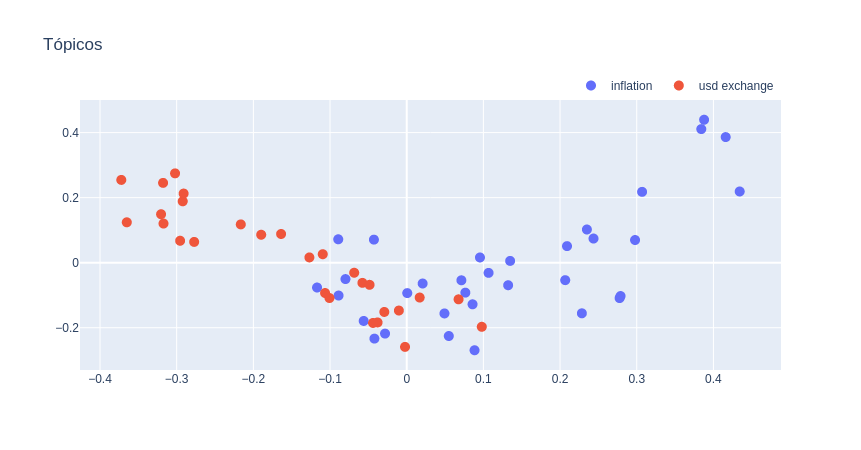

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = pca_tfidf[:n_inf_news,0], y = pca_tfidf[:n_inf_news,1],
    mode ='markers',
    textposition="middle left",
    text = labels[:n_inf_news],
    marker = dict(
        size = 10,
    ),
    name='inflation'
))
fig.add_trace(go.Scatter(
    x = pca_tfidf[n_inf_news:,0], y = pca_tfidf[n_inf_news:,1],
    mode ='markers',
    text = labels[n_inf_news:],
    marker = dict(
        size = 10,
    ),
    name='usd exchange'
))

fig.update_layout(title='Tópicos', 
                  xaxis_zeroline=True,
                  legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=1,
                        xanchor="right",
                        x=1
                  )
)

fig.show()

Both linear combinations classify the same documents as outliers. Although these deal about the same topic (inflation), they are more focused on the monetary view or explaination of the phenomenon. Since they were not miss labeled, we decide not to remove them from the database.